# 기초데이터과학 (01분반)

## 11-1. 상관 분석 (Correlation analysis)

### Acknowledgement
#### 이 자료는 다음 서적의 내용을 바탕으로 작성되었음
- 쉽게 배우는 파이썬 데이터 분석. 이지스 퍼블리싱

### 상관 분석 (Correlation analysis)
- 두 변수가 서로 관련이 있는지 상관관계를 분석하는 통계적 방법
- 관계의 방향과 관계의 강도를 분석할 수 있음
  - 관계의 방향: 한 변수가 증가할 때 다른 변수가 증가(양의 상관관계)/감소(음의 상관관계) 하는지 확인
  - 관계의 강도: 두 변수 간의 관계가 얼마나 밀접한지 측정
- 두 변수 사이의 관계의 방향과 강도를 이해하여 변수 간의 관계를 예측하거나 변수의 변화가 결과에 어떤 영향을 미칠지 파악할 수 있음
- 예
  - 기업의 광고비와 매출 간의 관계: 광고비를 증가했더니 매출액이 늘었다면 광고비와 매출액 간에는 양의 상관관계가 있음
  - 일평균 기온과 난방 에너지 소비량 간의 관계: 일평균 기온이 낮아지면 난방 에너지 소비가 증가했다면 일평균 기온과 난방 에너지 소비량 간에는 음의 상관관계가 있음


#### 상관 분석 종류
- 피어슨(Pearson) 상관 계수
  - 연속형 데이터에 적합
  - 데이터가 정규분포를 따르는 경우에 사용
  - 두 변수 간의 선형적 관계를 측정
- 스피어만(Spearman) 상관 계수
  - 순서형 데이터에 적합
  - 순위(rank) 값을 사용 (데이터의 절대적인 수치가 아닌 순서대로 정렬했을 때 순위)
  - 두 변수 간의 단조 관계(증가 또는 감소의 일관성. 순위의 일치 정도)를 측정 
  - 데이터가 정규분포를 따르지 않거나 비선형 관계일 때 사용

#### 상관계수(Correlation Coefficient) 
- 상관 분석의 결과로 산출되는 값으로, 두 변수 간의 상관관계를 1에서 -1 사이의 값으로 표현
- 1: 완전한 양의 상관관계. 한 변수가 증가할 때 다른 변수도 일정한 비율로 증가
- -1: 완전한 음의 상관관계. 한 변수가 증가할 때 다른 변수는 일정한 비율로 감소
- 0: 상관관계 없음. 두 변수 간에 선형적 관계가 없음

##### 피어슨 상관계수 r 정의
- 두 연속형 변수 \( X \) 와 \( Y \) 간의 **선형 관계의 강도와 방향**을 나타내는 지표
- 공분산을 각 변수의 표준편차로 나눈 값으로 정의

$$
r_{XY} = \frac{\mathrm{cov}(X, Y)}{\sigma_X \sigma_Y}
$$

$$
r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}
$$

In [16]:
import numpy as np

# 두 변수 (예: 공부시간과 시험점수)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# 평균
mean_x, mean_y = x.mean(), y.mean()

# 공분산
cov_xy = np.mean((x - mean_x) * (y - mean_y))

# 표준편차
std_x, std_y = x.std(), y.std()

# 피어슨 상관계수 계산
r = cov_xy / (std_x * std_y)
print("피어슨 상관계수 r =", r)

피어슨 상관계수 r = 0.7745966692414833


##### 스피어만 상관계수 정의
- 두 변수 간의 **순위(rank)** 관계를 기반으로 한 상관 측정 지표

$$
\rho = 1 - \frac{6 \sum_{i=1}^{n} d_i^2}{n(n^2 - 1)}
$$

|        기호        | 의미                                      |
| :--------------: | :-------------------------------------- |
|      $\rho$      | 스피어만 상관계수 (Spearman’s rank correlation) |
|       $d_i$      | 두 변수의 순위 차이, $d_i = R(x_i) - R(y_i)$   |
| $R(x_i), R(y_i)$ | 각각 $x_i, y_i$의 순위(rank), 동순위는 평균순위 사용  |
|        $n$       | 표본의 개수                                  |
|   $\sum d_i^2$   | 순위 차이 제곱의 합                             |


In [20]:
import numpy as np
import pandas as pd

# 변수 X, Y
X = np.array([10, 20, 30, 40, 50])
Y = np.array([8, 25, 35, 30, 70])

df = pd.DataFrame({'X': X, 'Y': Y})

# 순위(rank) 구하기
df['rank_X'] = df['X'].rank()
df['rank_Y'] = df['Y'].rank()

# 순위 차이 d_i 와 d_i^2 계산
df['d'] = df['rank_X'] - df['rank_Y']
df['d^2'] = df['d']**2

print(df)
n = len(df)

# 스피어만 상관계수 계산
rho_formula = 1 - (6 * df['d^2'].sum()) / (n * (n**2 - 1))

print("Spearman rho:", round(rho_formula, 3))

    X   Y  rank_X  rank_Y    d  d^2
0  10   8     1.0     1.0  0.0  0.0
1  20  25     2.0     2.0  0.0  0.0
2  30  35     3.0     4.0 -1.0  1.0
3  40  30     4.0     3.0  1.0  1.0
4  50  70     5.0     5.0  0.0  0.0
Spearman rho: 0.9


- 이미지 출처: Wikipedia
  
![상관계수](https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Correlation_coefficient.png/800px-Correlation_coefficient.png)
![상관계수](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)


#### 상관 분석의 유의점
- 인과 관계를 설명하지 않음: 상관관계는 변수 간의 관련성을 나타내는 것으로 인과 관계를 의미하지 않음
- 이상치의 영향: 이상치가 있을 경우 상관계수에 영향을 줄 수 있음

#### 시각화 및 탐색 방법
- 산점도(scatter plot): 가장 직관적인 관계 탐색 방법
  - 두 변수간 상관관계를 시각적으로 확인 가능
  - 선형성 확인, 이상치 감지, 패턴 확인
- 상관 행렬(correlation matrix)
  - corr() 함수
  - 여러 변수 간 상관계수를 확인 가능
- 히트맵(heatmap)
  - 여러 변수 간 상관관계를 시각적으로 확인 가능

#### 상관 분석 예제 1
- 실업자 수와 개인 소비 지출의 상관관계
  - econmoics 데이터

In [2]:
import pandas as pd

economics = pd.read_csv('economics.csv')
print(economics)

           date      pce         pop  psavert  uempmed  unemploy
0    1967-07-01    506.7  198712.000     12.6      4.5      2944
1    1967-08-01    509.8  198911.000     12.6      4.7      2945
2    1967-09-01    515.6  199113.000     11.9      4.6      2958
3    1967-10-01    512.2  199311.000     12.9      4.9      3143
4    1967-11-01    517.4  199498.000     12.8      4.7      3066
..          ...      ...         ...      ...      ...       ...
569  2014-12-01  12062.0  319746.157      7.6     12.9      8717
570  2015-01-01  12046.0  319928.646      7.7     13.2      8903
571  2015-02-01  12082.4  320074.511      7.9     12.9      8610
572  2015-03-01  12158.3  320230.786      7.4     12.0      8504
573  2015-04-01  12193.8  320402.295      7.6     11.5      8526

[574 rows x 6 columns]


- date: 데이터 수집 월 (Month of data collection)
- pce: 개인 소비 지출 - 십억 달러 (personal consumption expenditures, in billions of dollars, https://fred.stlouisfed.org/series/PCE)
- pop: 인구수 - 천 명 (total population, in thousands, https://fred.stlouisfed.org/series/POP)
- psavert: 개인 저축율 (personal savings rate, https://fred.stlouisfed.org/series/PSAVERT/)
- uempmed: 실업 기간 중앙값 - 주 (median duration of unemployment, in weeks, https://fred.stlouisfed.org/series/UEMPMED)
- unemploy: 실업자 수 - 천 명 (number of unemployed in thousands, https://fred.stlouisfed.org/series/UNEMPLOY)

##### 요약 통계량 확인

In [3]:
economics.describe()

,pce,pop,psavert,uempmed,unemploy
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,4820.092683,257159.652662,8.567247,8.608711,7771.310105
std,3556.803613,36682.398508,2.964179,4.106645,2641.959180
min,506.700000,198712.000000,2.200000,4.000000,2685.000000
25%,1578.300000,224896.000000,6.400000,6.000000,6284.000000
50%,3936.850000,253060.000000,8.400000,7.500000,7494.000000
75%,7626.325000,290290.750000,11.100000,9.100000,8685.500000
max,12193.800000,320402.295000,17.300000,25.200000,15352.000000


##### 관계 그래프 확인

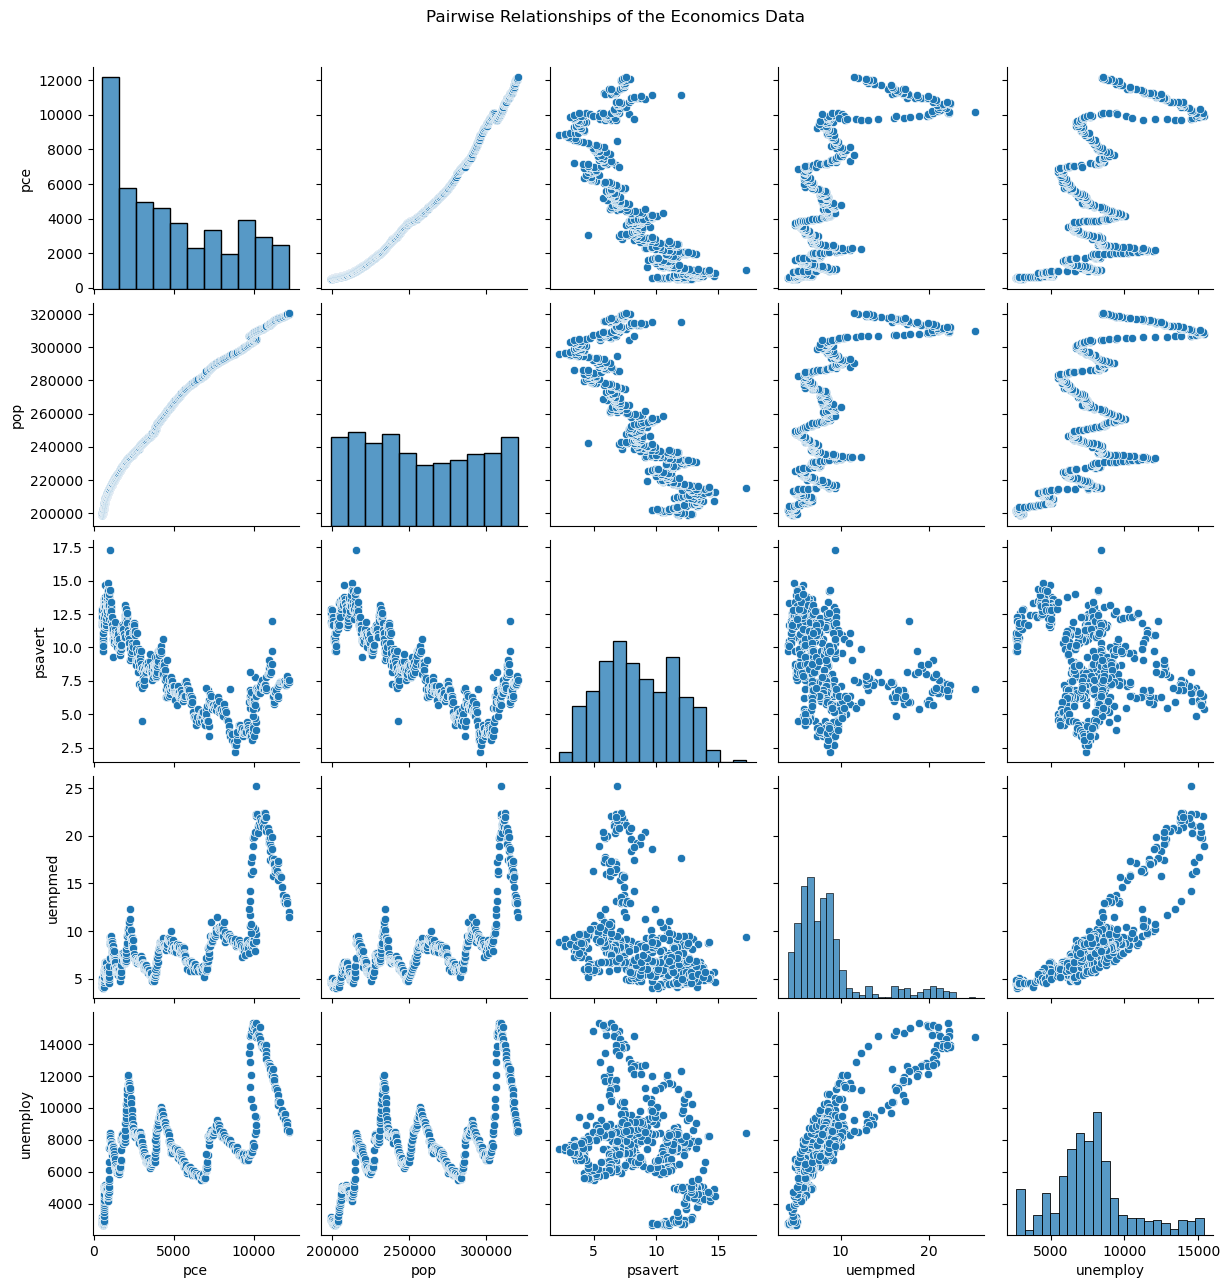

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=economics)

plt.suptitle('Pairwise Relationships of the Economics Data', y=1.03)

plt.show()

##### 상관계수 확인
- pandas.DataFrame.corr() 함수 (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
  - DataFrame 객체의 변수(컬럼) 쌍의 상관계수를 계산 (default 방식은 Pearson 상관계수)
  - 변수들 간의 상관계수를 나타내는 상관 행렬 생성
  - method 매개변수로 ‘pearson’, ‘spearman’ 선택 가능

In [5]:
print(economics[['pce', 'psavert', 'uempmed', 'unemploy']].corr())

               pce   psavert   uempmed  unemploy
pce       1.000000 -0.792855  0.726962  0.614518
psavert  -0.792855  1.000000 -0.325138 -0.309377
uempmed   0.726962 -0.325138  1.000000  0.869310
unemploy  0.614518 -0.309377  0.869310  1.000000


- pce와 psavert 사이는 음의 상관관계
- pce와 uempmed 사이는 양의 상관관계
- pce와 unemploy 사이는 양의 상관관계
- psavert와 uempmed 사이는 음의 상관관계
- psavert와 unemploy 사이는 음의 상관관계

#### 상관 분석 예제 2
- 자동차 데이터에서 여러 변수간의 상관관계
  - mtcars 데이터

In [6]:
import pandas as pd

mtcars = pd.read_csv('mtcars.csv')
print(mtcars.head(10))

    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2
5  18.1    6  225.0  105  2.76  3.460  20.22   1   0     3     1
6  14.3    8  360.0  245  3.21  3.570  15.84   0   0     3     4
7  24.4    4  146.7   62  3.69  3.190  20.00   1   0     4     2
8  22.8    4  140.8   95  3.92  3.150  22.90   1   0     4     2
9  19.2    6  167.6  123  3.92  3.440  18.30   1   0     4     4


- mpg: 마일 당 갤런(Gallon)으로 자동차의 연비를 나타내는 변수
- cyl: 엔진 실린더 수를 나타내는 변수
- disp: 엔진 배기량(Displacement)을 나타내는 변수
- hp: 최대 출력 마력(Horsepower)을 나타내는 변수
- drat: 후륜 비율을 나타내는 변수
- wt: 자동차의 무게(Weight)를 나타내는 변수
- qsec: 1/4 마일 동안 가속 시간을 나타내는 변수
- vs: V/S 엔진 유형 (V 엔진: 0, S 엔진: 1)
- am: 변속기 유형 (자동: 0, 수동: 1)
- gear: 전진 기어 수를 나타내는 변수
- carb: 기화기 수를 나타내는 변수

##### 요약 통계량 확인

In [7]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


##### 관계 그래프 확인
- 변수가 너무 많으므로 일부 변수만 선택하여 관계 그래프를 그려보자

    mpg  cyl   disp   hp     wt
0  21.0    6  160.0  110  2.620
1  21.0    6  160.0  110  2.875
2  22.8    4  108.0   93  2.320
3  21.4    6  258.0  110  3.215
4  18.7    8  360.0  175  3.440


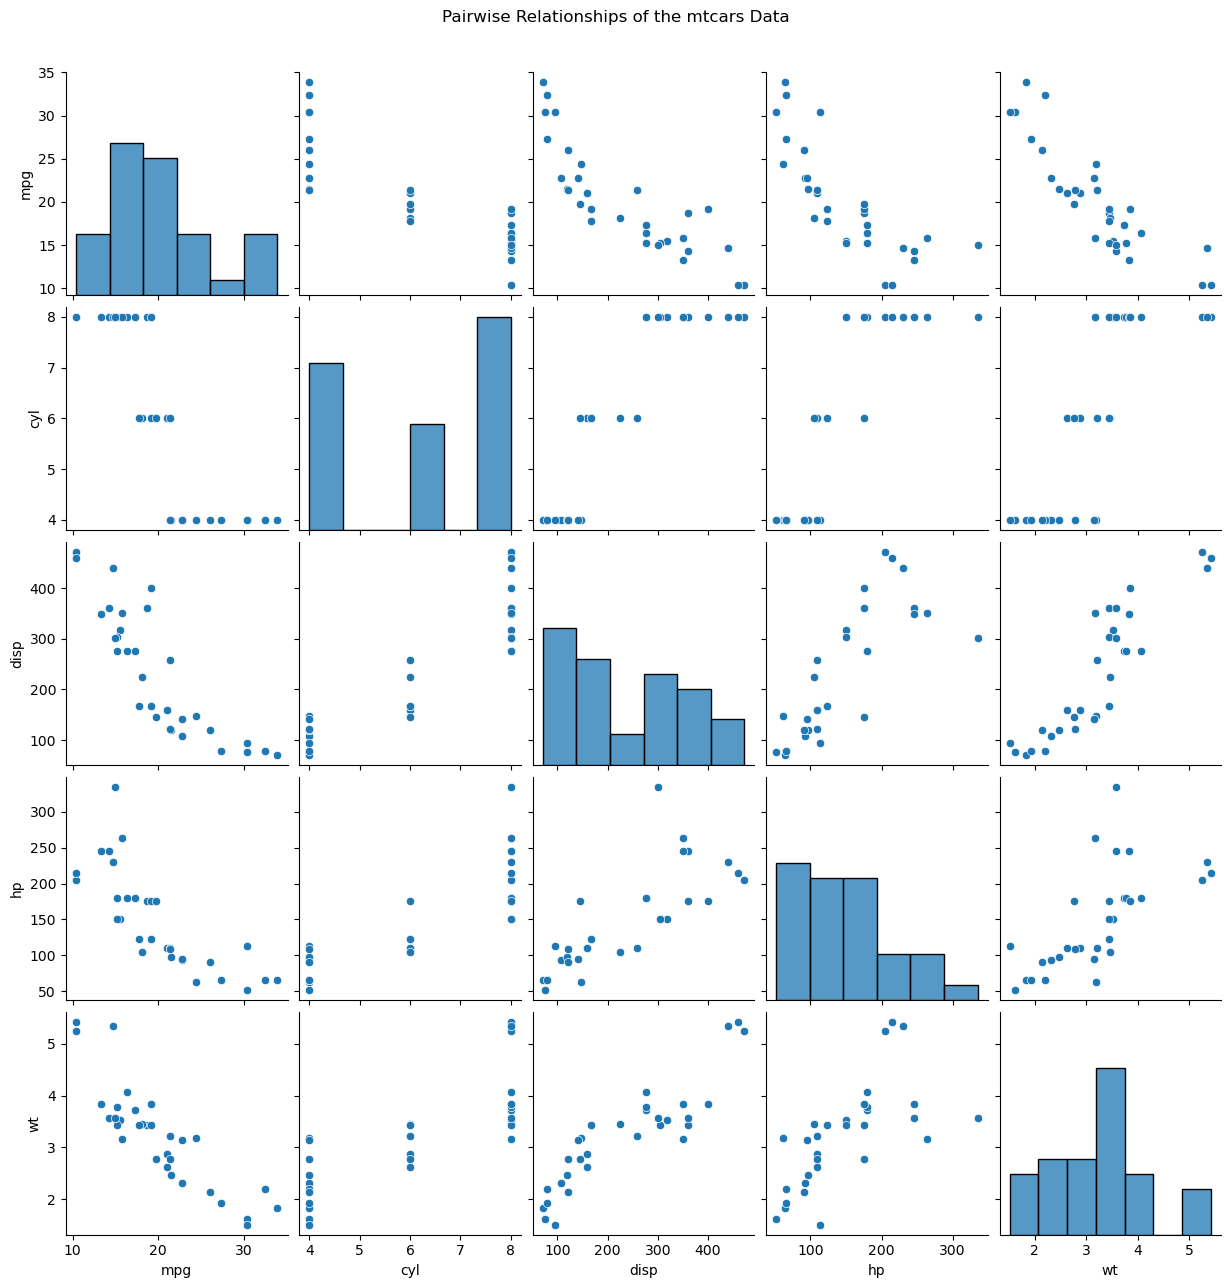

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

cars = mtcars[['mpg', 'cyl', 'disp', 'hp', 'wt']]
print(cars.head())

sns.pairplot(data=cars)

plt.suptitle('Pairwise Relationships of the mtcars Data', y=1.03)

plt.show()

##### 상관계수 확인
- 여러 변수 간의 상관계수를 보여주는 상관 행렬 구하기

In [9]:
car_cor = mtcars.corr()
car_cor = round(car_cor, 2) # 반올림하여 소수점 둘째 자리까지 표현
print(car_cor)

       mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
mpg   1.00 -0.85 -0.85 -0.78  0.68 -0.87  0.42  0.66  0.60  0.48 -0.55
cyl  -0.85  1.00  0.90  0.83 -0.70  0.78 -0.59 -0.81 -0.52 -0.49  0.53
disp -0.85  0.90  1.00  0.79 -0.71  0.89 -0.43 -0.71 -0.59 -0.56  0.39
hp   -0.78  0.83  0.79  1.00 -0.45  0.66 -0.71 -0.72 -0.24 -0.13  0.75
drat  0.68 -0.70 -0.71 -0.45  1.00 -0.71  0.09  0.44  0.71  0.70 -0.09
wt   -0.87  0.78  0.89  0.66 -0.71  1.00 -0.17 -0.55 -0.69 -0.58  0.43
qsec  0.42 -0.59 -0.43 -0.71  0.09 -0.17  1.00  0.74 -0.23 -0.21 -0.66
vs    0.66 -0.81 -0.71 -0.72  0.44 -0.55  0.74  1.00  0.17  0.21 -0.57
am    0.60 -0.52 -0.59 -0.24  0.71 -0.69 -0.23  0.17  1.00  0.79  0.06
gear  0.48 -0.49 -0.56 -0.13  0.70 -0.58 -0.21  0.21  0.79  1.00  0.27
carb -0.55  0.53  0.39  0.75 -0.09  0.43 -0.66 -0.57  0.06  0.27  1.00


- mpg(연비) 행과 cyl(실린더 수) 열이 교차되는 부분을 보면 상관계수가 -0.85이므로, 연비가 높을수록 실린더 수가 적은 경향이 있음
- cyl(실린더 수)과 wt(무게)의 상관계수가 0.78이므로 실린더 수가 많을수록 자동차가 무거운 경향이 있음

##### 히트맵 만들기
- 여러 변수로 상관 행렬을 만들면 출력된 값이 너무 많아서 관심있는 변수들의 관계를 파악하기 어려움
- 이럴 때 값의 크기를 색깔로 표현한 히트맵(heatmap)을 만들면 변수들의 관계를 쉽게 파악할 수 있음

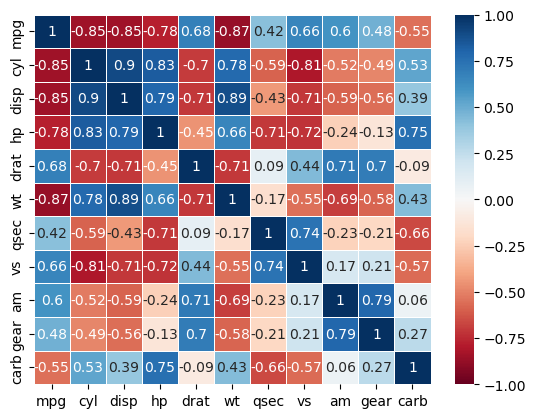

In [10]:
import seaborn as sns

sns.heatmap(car_cor, annot = True, cmap = 'RdBu', vmax = 1, vmin = -1, linewidths = 0.5)
# linewidths 매개변수: 셀 간의 경계 구분선

plt.show()

#### 연습문제 1
- 붓꽃(iris) 데이터에서 변수 간의 상관관계를 분석해보자

In [12]:
iris = pd.read_csv('iris.csv')

print(iris.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


- Sepal: 꽃받침
  - Sepal length: 꽃받침 길이
  - Sepal width: 꽃받침 너비
- Petal: 꽃잎
  - Petal length: 꽃잎 길이
  - Petal width: 꽃받침 너비

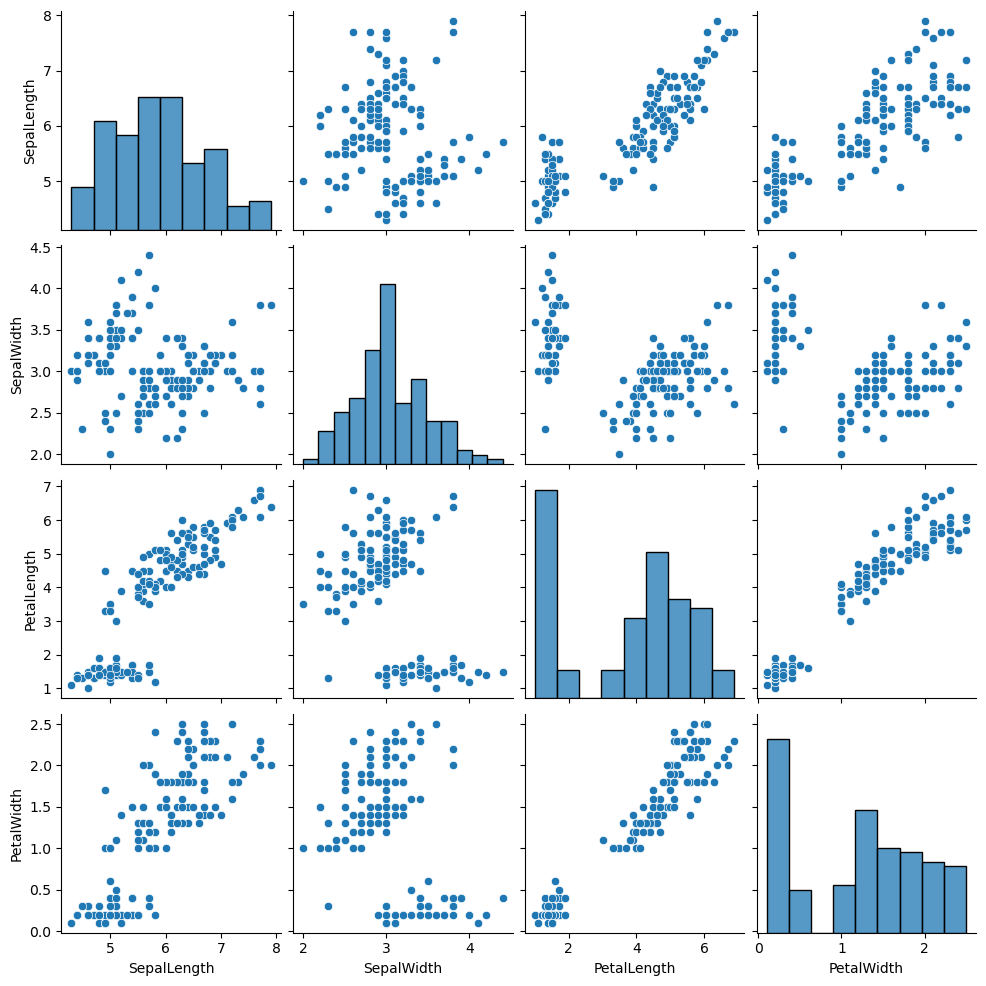

In [13]:
sns.pairplot(data=iris)

plt.show()

0. 문자열 변수인 Name 변수를 제외한 나머지 변수만 추출하고 이를 이용하여 상관행렬을 구하여 출력하시오.

1. 양의 상관관계에 있으면서 강도가 가장 큰 두 변수는 무엇인가?

2. 양의 상관관계에 있으면서 강도가 가장 약한 두 변수는 무엇인가?

3. 음의 상관관계에 있으면서 강도가 가장 큰 두 변수는 무엇인가?

#### 연습문제 2
- 팁(tips) 데이터에서 변수 간의 상관관계를 분석해보자

In [15]:
tips = pd.read_csv('tips.csv')

print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50     NaN     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


1. tips 데이터에서 수치형 데이터 변수인 total_bill, tip, size 변수만 추출하고 이를 이용하여 상관행렬을 구하여 출력하시오.

2. tip과 양의 상관관계가 가장 큰 변수는 무엇인가?